# Lab 5: Subset Selection Methods, Ridge Regression, Lasso Regression

## Problem 8

In [1]:
### Parts a and b: Generate data

In [2]:
# I picked an arbitrary number 37
X = rnorm(100)
noise = rnorm(100)
Y = 37 + 10*X - 15*X*X + 20*X*X*X + noise
data = data.frame(Y,X,X^2, X^3, X^4, X^5, X^6, X^7, X^8, X^9, X^10)
data[1:5,]

Y,X,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10
23.28785,-0.5497182,0.3021901,-0.16611939,0.09131885,-0.050199636,0.027595653,-1.516983e-02,8.339133e-03,-4.584173e-03,2.520003e-03
-52.76261,-1.3431063,1.8039346,-2.42287606,3.25418020,-4.370710061,5.870328398,-7.884475e+00,1.058969e+01,-1.422308e+01,1.910311e+01
38.98347,0.3672178,0.1348489,0.04951893,0.01818423,0.006677574,0.002452124,9.004636e-04,3.306663e-04,1.214265e-04,4.458999e-05
-90.85609,-1.5625035,2.4414172,-3.81472297,5.96051803,-9.313330332,14.552111327,-2.273773e+01,3.552778e+01,-5.551227e+01,8.673812e+01
47.50255,0.8213209,0.6745680,0.55403675,0.45504194,0.373735440,0.306956715,2.521100e-01,2.070632e-01,1.700653e-01,1.396782e-01


### Part c: Run Best Subset Selection for the best model from $x^1...x^{p=10}$

In [3]:
library(leaps)

In [4]:
regfit.full = regsubsets(Y~., data=data, nvmax=10)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Y ~ ., data = data, nvmax = 10)
10 Variables  (and intercept)
     Forced in Forced out
X        FALSE      FALSE
X.2      FALSE      FALSE
X.3      FALSE      FALSE
X.4      FALSE      FALSE
X.5      FALSE      FALSE
X.6      FALSE      FALSE
X.7      FALSE      FALSE
X.8      FALSE      FALSE
X.9      FALSE      FALSE
X.10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X   X.2 X.3 X.4 X.5 X.6 X.7 X.8 X.9 X.10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " " 
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " " 
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " " 
4  ( 1 )  "*" "*" "*" " " " " "*" " " " " " " " " 
5  ( 1 )  "*" "*" "*" " " " " " " " " "*" " " "*" 
6  ( 1 )  "*" "*" "*" " " " " "*" " " "*" " " "*" 
7  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " "*" 
8  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" "*" "*" 
9  ( 1 )  "*" "*" "*" "*" "*" "*" " " "*" "*" "*" 
10  ( 1 ) "*" "*" "*" "*" "*"

The above cell tells us the best factors to use in the case of each degree of polynomial (i.e: The best factors to use with just one predictor would be $X^3$)

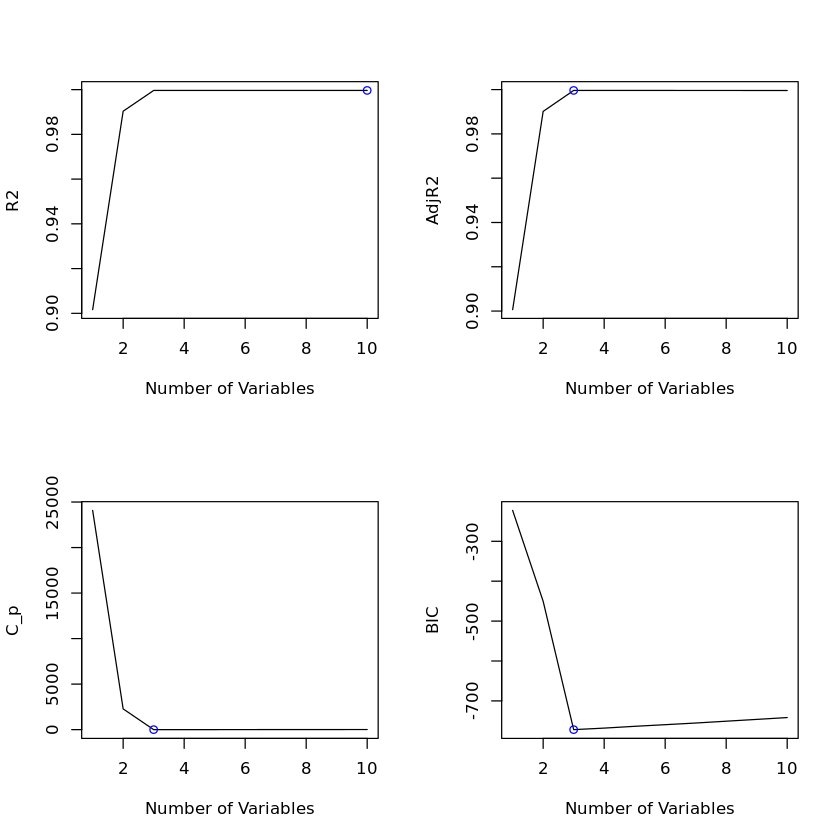

In [5]:
par(mfrow = c(2,2))
summary = summary(regfit.full)

#plot of R^2
plot(summary$rsq, xlab="Number of Variables", ylab = "R2", type="l") # want the max
points(which.max(summary$rsq), summary$rsq[which.max(summary$rsq)], col="blue")

#plot of adj R^2
plot(summary$adjr2, xlab="Number of Variables", ylab="AdjR2", type="l") #want the max
points(which.max(summary$adjr2), summary$adjr2[which.max(summary$adjr2)], col="blue")

#plot of Cp
plot(summary$cp, xlab="Number of Variables", ylab="C_p", type="l") # want the min
points(which.min(summary$cp), summary$cp[which.min(summary$cp)], col="blue")

#plot of BIC
plot(summary$bic, xlab="Number of Variables", ylab="BIC", type="l") #want the min
points(which.min(summary$bic), summary$bic[which.min(summary$bic)], col="blue")

All of them seem to be all over the place! The Adjusted R2 value and C_p values prefer a polynomial of degree 6, while the BIC accurately predicts that the polynomial should be of degree 3.

### Part d: Same, but with Forward/Backward Stepwise Selection

In [6]:
regfit.fwd = regsubsets(Y~., data=data, nvmax=10, method="forward")
regfit.bwd = regsubsets(Y~., data=data, nvmax=10, method="backward")

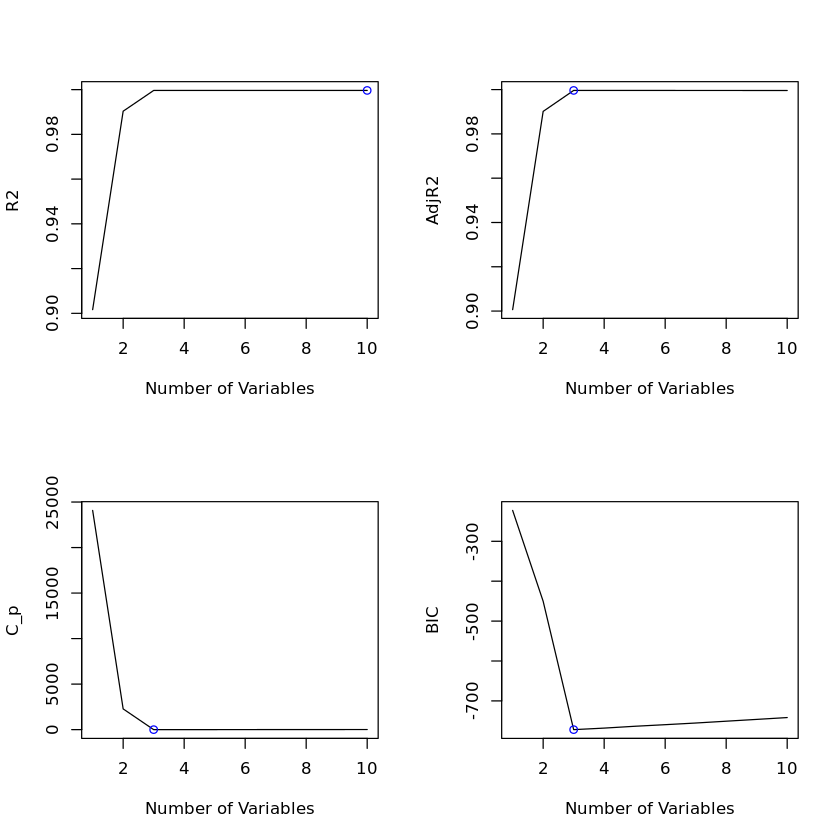

In [7]:
# FORWARD STEPWISE SELECTION
par(mfrow = c(2,2))
summary = summary(regfit.fwd)

#plot of R^2
plot(summary$rsq, xlab="Number of Variables", ylab = "R2", type="l") # want the max
points(which.max(summary$rsq), summary$rsq[which.max(summary$rsq)], col="blue")

#plot of adj R^2
plot(summary$adjr2, xlab="Number of Variables", ylab="AdjR2", type="l") #want the max
points(which.max(summary$adjr2), summary$adjr2[which.max(summary$adjr2)], col="blue")

#plot of Cp
plot(summary$cp, xlab="Number of Variables", ylab="C_p", type="l") # want the min
points(which.min(summary$cp), summary$cp[which.min(summary$cp)], col="blue")

#plot of BIC
plot(summary$bic, xlab="Number of Variables", ylab="BIC", type="l") #want the min
points(which.min(summary$bic), summary$bic[which.min(summary$bic)], col="blue")

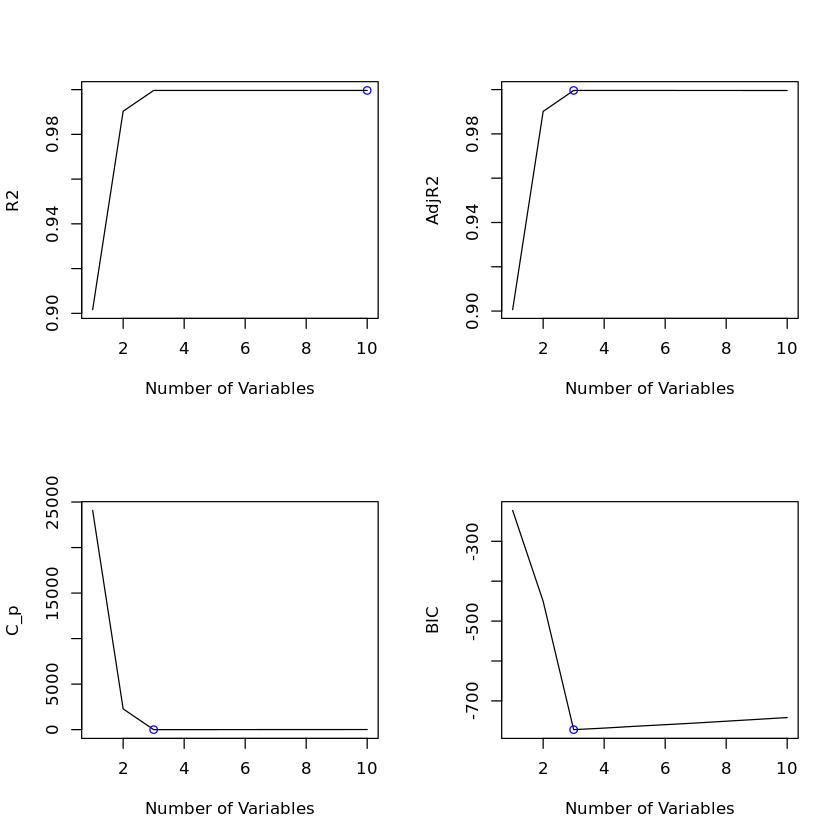

In [8]:
#BACKWARD STEPWISE SELECTION

par(mfrow = c(2,2))
summary = summary(regfit.bwd)

#plot of R^2
plot(summary$rsq, xlab="Number of Variables", ylab = "R2", type="l") # want the max
points(which.max(summary$rsq), summary$rsq[which.max(summary$rsq)], col="blue")

#plot of adj R^2
plot(summary$adjr2, xlab="Number of Variables", ylab="AdjR2", type="l") #want the max
points(which.max(summary$adjr2), summary$adjr2[which.max(summary$adjr2)], col="blue")

#plot of Cp
plot(summary$cp, xlab="Number of Variables", ylab="C_p", type="l") # want the min
points(which.min(summary$cp), summary$cp[which.min(summary$cp)], col="blue")

#plot of BIC
plot(summary$bic, xlab="Number of Variables", ylab="BIC", type="l") #want the min
points(which.min(summary$bic), summary$bic[which.min(summary$bic)], col="blue")

In [9]:
coef(regfit.full, 3)
coef(regfit.fwd, 3)
coef(regfit.bwd, 3)

(Intercept)           X         X.2         X.3 
   36.83981    10.02031   -14.89995    19.94109

(Intercept)           X         X.2         X.3 
   36.83981    10.02031   -14.89995    19.94109

(Intercept)           X         X.2         X.3 
   36.83981    10.02031   -14.89995    19.94109

Using backward and forward had all three methods predict the same polynomial degrees--3 and 6 (and 7). Using different methods did give us different values on what the best model should be.

_Just kidding. Every time I restart and re-run the kernel, I will sometimes have all of the Cp, BIC, AIC agree, and sometimes they will not. Thanks rand()._

Surprisingly enough, all of my models of degree 3 turned out to be the same--something I really didn't expect after watching Tim flail around with his lab because his C_p, BIC, and AdjR2 kept telling him that the best model was of degree 10.

### Part e: Use Lasso Regression

In [10]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



To find the best model with the best model of $\lambda$, we want to evaluate several models and then use Cross Validation to find the best one.

In [11]:
grid=10^seq(10, -2, length=500) #creates 500 numbers of 10^10,..., 10^9, ... 10^.01

In [12]:
#glmnet can not use Y~., data=data
lassoX = model.matrix(Y~.,data=data)[,-1]
lassoY = Y

In [13]:
lassoX[1:5,]

,X,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10
1,-0.5497182,0.3021901,-0.16611939,0.09131885,-0.050199636,0.027595653,-1.516983e-02,8.339133e-03,-4.584173e-03,2.520003e-03
2,-1.3431063,1.8039346,-2.42287606,3.25418020,-4.370710061,5.870328398,-7.884475e+00,1.058969e+01,-1.422308e+01,1.910311e+01
3,0.3672178,0.1348489,0.04951893,0.01818423,0.006677574,0.002452124,9.004636e-04,3.306663e-04,1.214265e-04,4.458999e-05
4,-1.5625035,2.4414172,-3.81472297,5.96051803,-9.313330332,14.552111327,-2.273773e+01,3.552778e+01,-5.551227e+01,8.673812e+01
5,0.8213209,0.6745680,0.55403675,0.45504194,0.373735440,0.306956715,2.521100e-01,2.070632e-01,1.700653e-01,1.396782e-01


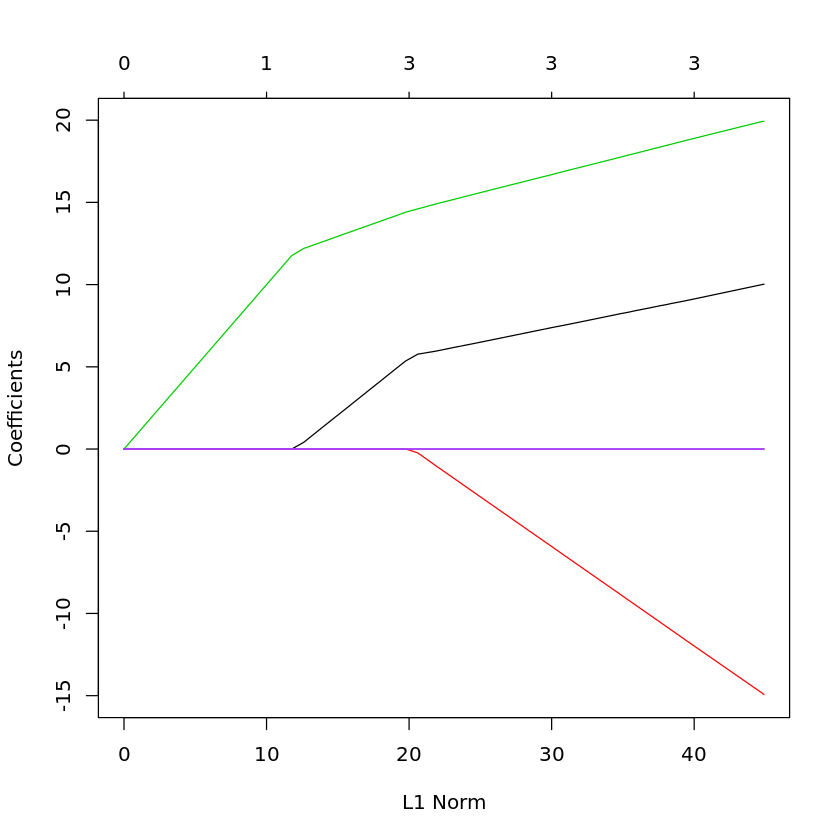

In [14]:
lasso.mod=glmnet(lassoX, lassoY, alpha=1, lambda=grid)
plot(lasso.mod)

In [15]:
#There are 11 predictors (10 + intercept) and 500 different lambda values
dim(coef(lasso.mod)) 

[1]  11 500

In [16]:
# At lambda = 0, the coefs should be exactly to linear regression

#With lambda = 0.1
coef(lasso.mod)[,500] 

# With lambda = 0
coef(glmnet(lassoX, lassoY, alpha=1, lambda=0))[,1]

# linear regression (minimize RSS)
summary(lm(Y~.,data=data))$coefficients[,1]

(Intercept)             X           X.2           X.3           X.4 
 3.685681e+01  1.002871e+01 -1.493885e+01  1.992953e+01  0.000000e+00 
          X.5           X.6           X.7           X.8           X.9 
 3.661090e-06  0.000000e+00  0.000000e+00  1.040875e-04  0.000000e+00 
         X.10 
 3.343386e-04

(Intercept)             X           X.2           X.3           X.4 
 36.736922178  10.855619235 -14.483188641  18.237512676  -0.239446091 
          X.5           X.6           X.7           X.8           X.9 
  0.745130777   0.004458178  -0.035084494   0.005726951  -0.013932602 
         X.10 
  0.000707326

(Intercept)             X           X.2           X.3           X.4 
 36.922658604   9.982492242 -15.761047111  20.081520612   2.143862372 
          X.5           X.6           X.7           X.8           X.9 
 -0.053411288  -1.879243658  -0.016130336   0.633703252   0.005136805 
         X.10 
 -0.070371375

I'm not too sure why the linear model and the lambda = 0 aren't giving us the same values.. But we should look for the model with the best lambda values via cross validation.

In [17]:
set.seed(1)
trainIndices=sample(1:100, 80)
trainingSet=lassoX[trainIndices,]
testingSet=lassoX[-trainIndices,]

lasso.mod=glmnet(lassoX[trainIndices,], lassoY[trainIndices],
                 alpha=1, lambda=grid, thresh=1e-12)

In [18]:
lasso.pred=predict(lasso.mod, s=1, newx=lassoX[-trainIndices,])

# Determines the MSE of the test dataset.
mean((lasso.pred-lassoY[-trainIndices])^2)

[1] 3.521626

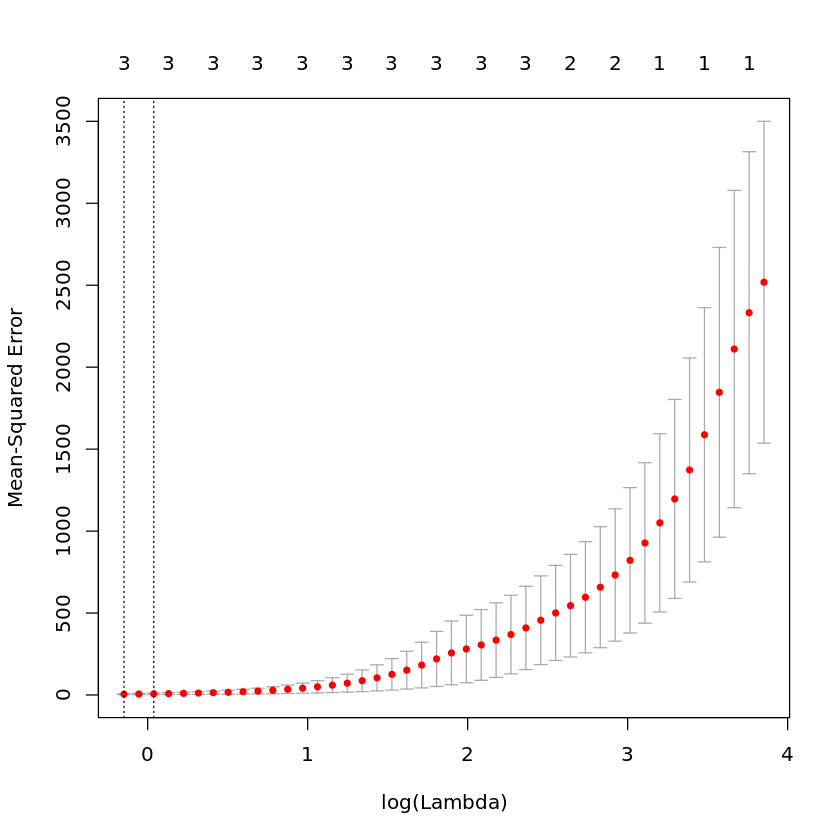

In [19]:
#run cv to find best lambda.
cv.out=cv.glmnet(lassoX[trainIndices,], lassoY[trainIndices], alpha=1)
plot(cv.out)
bestlam=cv.out$lambda.min

In [20]:
bestlam

[1] 0.8623106

The best value for our lambda is the value above.

In [21]:
lasso.pred=predict(lasso.mod, s=bestlam, newx=lassoX[-trainIndices,])
# MSE of our best model with the best value for lambda.
mean((lasso.pred-lassoY[-trainIndices])^2)

[1] 2.897235

In [22]:
out=glmnet(lassoX, lassoY, alpha=1, lambda=grid)
lasso.coef=predict(out, type="coefficients", s=bestlam)
lasso.coef

11 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept)  36.105389
X             9.697532
X.2         -13.845233
X.3          19.563205
X.4           .       
X.5           .       
X.6           .       
X.7           .       
X.8           .       
X.9           .       
X.10          .       

The above are the coefficients of the best model using lasso regression.

### Part f: And again! But with a new model:
$$Y=\beta_0+\beta_7X^7+\varepsilon$$

In [23]:
X = rnorm(100)
noise = rnorm(100)
Y = 37 + 19*X*X*X*X*X*X*X + noise
data = data.frame(Y,X,X^2, X^3, X^4, X^5, X^6, X^7, X^8, X^9, X^10)
data[95:100,]

,Y,X,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10
95,37.14720,-0.33400084,0.111556563,-3.725999e-02,1.244487e-02,-4.156596e-03,1.388307e-03,-4.636956e-04,1.548747e-04,-5.172828e-05,1.727729e-05
96,38.13021,-0.03472603,0.001205897,-4.187601e-05,1.454188e-06,-5.049816e-08,1.753601e-09,-6.089558e-11,2.114662e-12,-7.343381e-14,2.550064e-15
97,38.28399,0.78763961,0.620376148,4.886328e-01,3.848666e-01,3.031361e-01,2.387620e-01,1.880584e-01,1.481223e-01,1.166670e-01,9.189153e-02
98,3187.22384,2.07524501,4.306641846,8.937337e+00,1.854716e+01,3.848991e+01,7.987599e+01,1.657623e+02,3.439973e+02,7.138787e+02,1.481473e+03
99,58.64039,1.02739244,1.055535223,1.084449e+00,1.114155e+00,1.144674e+00,1.176029e+00,1.208244e+00,1.241340e+00,1.275344e+00,1.310279e+00
100,109.20373,1.20790840,1.459042699,1.762390e+00,2.128806e+00,2.571402e+00,3.106018e+00,3.751786e+00,4.531813e+00,5.474015e+00,6.612109e+00


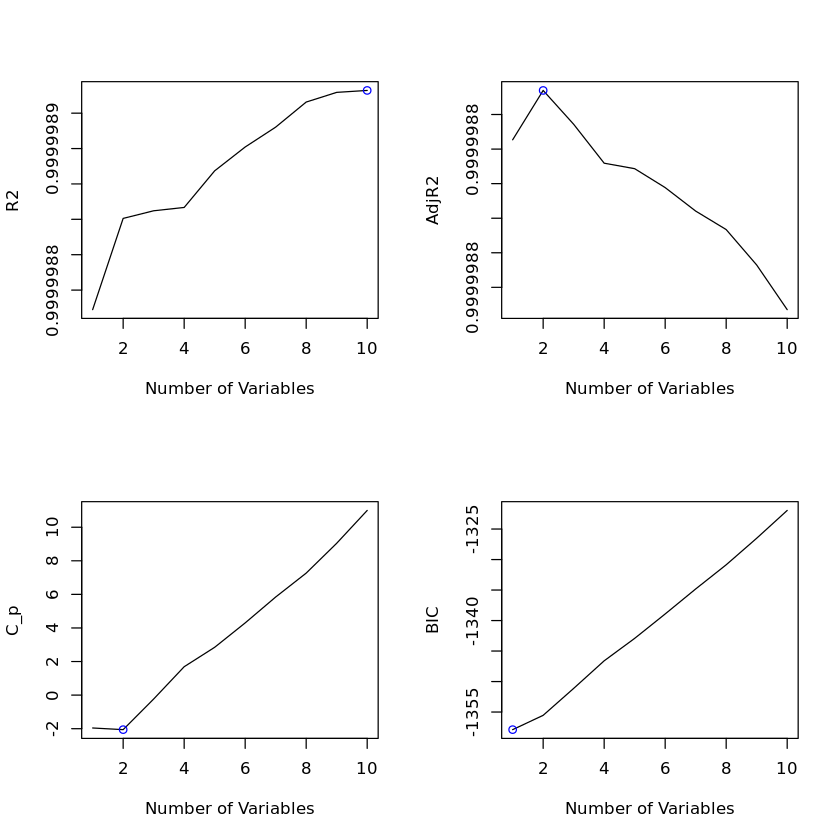

In [24]:
regfit.full = regsubsets(Y~., data=data, nvmax=10)
par(mfrow = c(2,2))
summary = summary(regfit.full)

#plot of R^2
plot(summary$rsq, xlab="Number of Variables", ylab = "R2", type="l") # want the max
points(which.max(summary$rsq), summary$rsq[which.max(summary$rsq)], col="blue")

#plot of adj R^2
plot(summary$adjr2, xlab="Number of Variables", ylab="AdjR2", type="l") #want the max
points(which.max(summary$adjr2), summary$adjr2[which.max(summary$adjr2)], col="blue")

#plot of Cp
plot(summary$cp, xlab="Number of Variables", ylab="C_p", type="l") # want the min
points(which.min(summary$cp), summary$cp[which.min(summary$cp)], col="blue")

#plot of BIC
plot(summary$bic, xlab="Number of Variables", ylab="BIC", type="l") #want the min
points(which.min(summary$bic), summary$bic[which.min(summary$bic)], col="blue")

Using Best Subset Selection suggests that polynomial order 3 would be the best, after considering the adjusted R^2 and C_p (or at least it wil be until I restart the kernal again..)

[1] 6.849939

[1] 2819.953

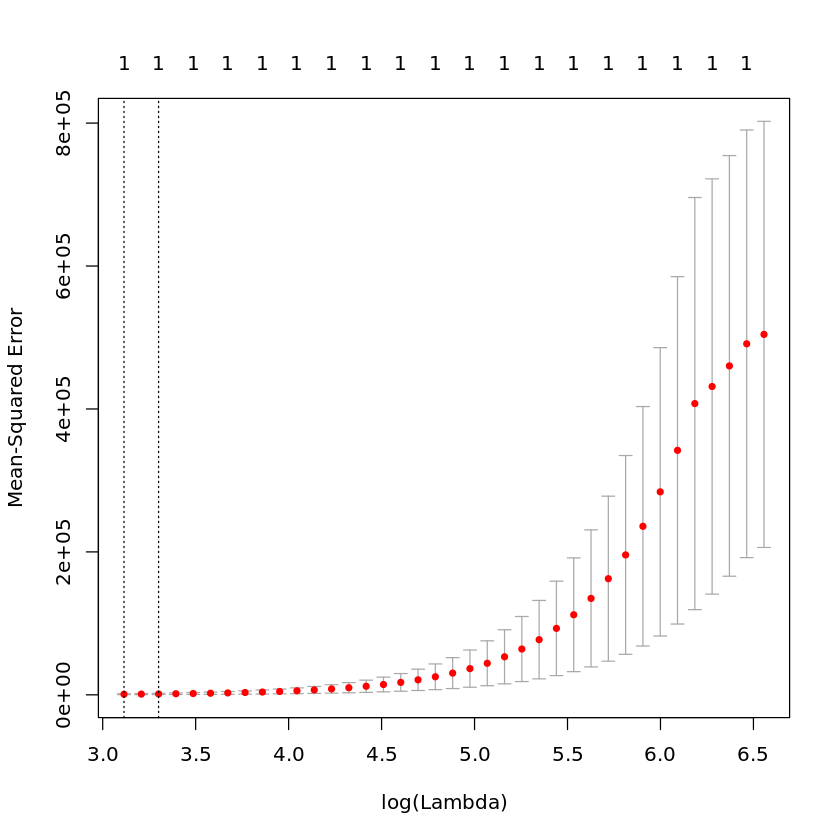

In [25]:
lassoX = model.matrix(Y~.,data=data)[,-1]
lassoY = Y

set.seed(1)
trainIndices=sample(1:100, 80)
trainingSet=lassoX[trainIndices,]
testingSet=lassoX[-trainIndices,]

lasso.mod=glmnet(lassoX[trainIndices,], lassoY[trainIndices],
                 alpha=1, lambda=grid, thresh=1e-12)

lasso.pred=predict(lasso.mod, s=1, newx=lassoX[-trainIndices,])

# Determines the MSE of the test dataset.
mean((lasso.pred-lassoY[-trainIndices])^2)

#run cv to find best lambda.
cv.out=cv.glmnet(lassoX[trainIndices,], lassoY[trainIndices], alpha=1)
plot(cv.out)
bestlam=cv.out$lambda.min

lasso.pred=predict(lasso.mod, s=bestlam, newx=lassoX[-trainIndices,])
# MSE of our best model with the best value for lambda.
mean((lasso.pred-lassoY[-trainIndices])^2)

out=glmnet(lassoX, lassoY, alpha=1, lambda=grid)
lasso.coef=predict(out, type="coefficients", s=bestlam)


In [26]:
lasso.coef
coef(regfit.full, 3)

11 x 1 sparse Matrix of class "dgCMatrix"
                   1
(Intercept) 40.96037
X            .      
X.2          .      
X.3          .      
X.4          .      
X.5          .      
X.6          .      
X.7         18.55831
X.8          .      
X.9          .      
X.10         .      

(Intercept)         X.4         X.6         X.7 
36.86440628  0.12351951 -0.02175241 18.99911057

The coefficients are the same, but using lasso regression seems to have gotten rid of every predictor, other than 7.

## Problem 9

In [27]:
library(ISLR)

In [28]:
College[1:5,]
names(College)
dim(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


[1] "Private"     "Apps"        "Accept"      "Enroll"      "Top10perc"  
 [6] "Top25perc"   "F.Undergrad" "P.Undergrad" "Outstate"    "Room.Board" 
[11] "Books"       "Personal"    "PhD"         "Terminal"    "S.F.Ratio"  
[16] "perc.alumni" "Expend"      "Grad.Rate"

[1] 777  18

### Part a: Split data into training and testing.

In [29]:
trainIndices=sample(1:777,621) #80/20 split
trainSet=College[trainIndices,]
testSet=College[-trainIndices,]
dim(trainSet)
dim(testSet)

[1] 621  18

[1] 156  18

### Part b: Create Linear Model, Find Test Error.

In [30]:
glm.model = glm(Apps~., data=trainSet)
summary(lm.model)

ERROR: Error in summary(lm.model): object 'lm.model' not found


In [ ]:
glm.predictions = predict(lm.model, newdata=testSet)
mean((testSet$Apps - glm.predictions)^2)

The MSE for a linear model is above. 

### Part c: Again, but with Ridge Regression.

In [ ]:
grid=10^seq(10,-3, length=100)

x=model.matrix(trainSet$Apps~.,trainSet)[,-1]
y=trainSet$Apps

# creates 100 models on different lambdas
ridge.mod=glmnet(x,y,alpha=0, lambda=grid)

# Use cross validation to find the best lambda.
cv.out = cv.glmnet(x, y, alpha=0)
plot(cv.out)
bestlam=cv.out$lambda.min

In [ ]:
xTest=model.matrix(testSet$Apps~.,testSet)[,-1]
yTest=testSet$Apps
ridge.pred=predict(ridge.mod, s=bestlam, newx=xTest)
bestlam
mean((ridge.pred-yTest)^2)

Using $\lambda$ = ~414, I actually get a worse value for MSE than I did for linear regression.

### d.) On to Lasso Regression!

In [ ]:
grid=10^seq(10,-3, length=100)

x=model.matrix(trainSet$Apps~.,trainSet)[,-1]
y=trainSet$Apps

# creates 100 models on different lambdas
ridge.mod=glmnet(x,y,alpha=1, lambda=grid)

# Use cross validation to find the best lambda.
cv.out = cv.glmnet(x, y, alpha=1)
plot(cv.out)
bestlam=cv.out$lambda.min

xTest=model.matrix(testSet$Apps~.,testSet)[,-1]
yTest=testSet$Apps
ridge.pred=predict(ridge.mod, s=bestlam, newx=xTest)
bestlam
mean((ridge.pred-yTest)^2)

Lasso with $\lambda$ ~27 made this one even worse! Yikes!